In [2]:
#dailychallenge
import os #interagir avec ton système d’exploitation

url='https://github.com/devtlv/Datasets-DA-Bootcamp-2-/raw/refs/heads/main/Week%204%20-%20Data%20Understanding/W4D4%20-%20Data%20Preprocessing%20&%20T/Data%20Science%20Job%20Salary%20dataset.zip'


save_path ='/content/drive/MyDrive/00_bootcampGenIAML/DI-Bootcamp/Week2/Day3/DailyChallenge'
os.makedirs(save_path, exist_ok=True)# crée le dossier s’il n’existe pas déjà
zip_path = os.path.join(save_path, "Job_salary_dataset.zip")

# Télécharger le fichier .zip depuis l’URL et le placer dans le dossier
import urllib.request # used to open URLs
urllib.request.urlretrieve(url, zip_path) #télécharger un fichier depuis une URL et à l’enregistrer localement
print("Fichier téléchargé dans :", zip_path)

# Dézipper le fichier dans le même dossier
import zipfile
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(save_path)
print("Fichiers extraits dans :", save_path)



Fichier téléchargé dans : /content/drive/MyDrive/00_bootcampGenIAML/DI-Bootcamp/Week2/Day3/DailyChallenge/Job_salary_dataset.zip
Fichiers extraits dans : /content/drive/MyDrive/00_bootcampGenIAML/DI-Bootcamp/Week2/Day3/DailyChallenge


In [6]:
# Créer un DataFrame à partir du fichier train.csv
import pandas as pd
Salary_data=pd.read_csv('/content/drive/MyDrive/00_bootcampGenIAML/DI-Bootcamp/Week2/Day3/DailyChallenge/Data_Science_Job_Salary_dataset/datascience_salaries.csv')
# Explore the data frame
Salary_data.head()
print('\n')
print(Salary_data.info())
display(Salary_data.head())

Salary_data_0=Salary_data.copy() # garder un exemaplire des raw data





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1171 non-null   int64 
 1   job_title         1171 non-null   object
 2   job_type          1171 non-null   object
 3   experience_level  1171 non-null   object
 4   location          1171 non-null   object
 5   salary_currency   1171 non-null   object
 6   salary            1171 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 64.2+ KB
None


,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary
0,0,Data scientist,Full Time,Senior,New York City,USD,149000
1,2,Data scientist,Full Time,Senior,Boston,USD,120000
2,3,Data scientist,Full Time,Senior,London,USD,68000
3,4,Data scientist,Full Time,Senior,Boston,USD,120000
4,5,Data scientist,Full Time,Senior,New York City,USD,149000


In [7]:
from sklearn.preprocessing import MinMaxScaler

# Initialiser le MinMaxScaler
# Crée une instance de l'objet MinMaxScaler, qui sera utilisé pour normaliser les données.
scaler = MinMaxScaler()

# Normaliser la colonne 'salary' et créer une nouvelle colonne pour les salaires normalisés
# Applique la normalisation Min-Max à la colonne 'salary'. La méthode fit_transform calcule les paramètres de normalisation (min et max)
# à partir des données de la colonne 'salary' et les utilise ensuite pour transformer les données.
# Les données normalisées sont stockées dans une nouvelle colonne appelée 'salary_normalized'.
Salary_data['salary_normalized'] = scaler.fit_transform(Salary_data[['salary']])

# Afficher les premières lignes du DataFrame avec la nouvelle colonne normalisée
display(Salary_data.head())

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary,salary_normalized
0,0,Data scientist,Full Time,Senior,New York City,USD,149000,0.601010
1,2,Data scientist,Full Time,Senior,Boston,USD,120000,0.454545
2,3,Data scientist,Full Time,Senior,London,USD,68000,0.191919
3,4,Data scientist,Full Time,Senior,Boston,USD,120000,0.454545
4,5,Data scientist,Full Time,Senior,New York City,USD,149000,0.601010


In [8]:
# Identifier le set de modalités par colonne/variable
for col in Salary_data.columns:
    print(f"Colonne : {col}")
    # Afficher les valeurs uniques pour chaque colonne (utile pour les colonnes avec peu de modalités)
    unique_values = Salary_data[col].unique()
    print(f"  Modalités uniques : {unique_values}")
    # Afficher le nombre de valeurs uniques (utile pour les colonnes avec beaucoup de modalités)
    print(f"  Nombre de modalités uniques : {len(unique_values)}")
    print("-" * 30)

Colonne : Unnamed: 0
  Modalités uniques : [   0    2    3 ... 2250 2255 2259]
  Nombre de modalités uniques : 1171
------------------------------
Colonne : job_title
  Modalités uniques : ['Data scientist' 'Data analyst' 'Big data' 'Machine learning' 'ML Ops']
  Nombre de modalités uniques : 5
------------------------------
Colonne : job_type
  Modalités uniques : ['Full Time' 'Internship']
  Nombre de modalités uniques : 2
------------------------------
Colonne : experience_level
  Modalités uniques : ['Senior' 'Entry' 'Mid' 'Executive']
  Nombre de modalités uniques : 4
------------------------------
Colonne : location
  Modalités uniques : ['New York City' 'Boston' 'London' 'Research Triangle Park' 'Sydney'
 'San Francisco' 'Sofia' 'BangPa-in' 'Berlin' 'NAMER' 'Remote' 'San Jose'
 'Petaling Jaya' 'Englewood' 'Pune' 'Paris' 'Gothenburg' 'Mountain View'
 'Porto' 'Ontario' 'Brooklyn' 'Remote- US' 'Cambridge' 'La Libertad'
 'Lithuania | UK' 'Chicago' 'United Kingdom - Remote' 'Santiago

# Task
Convert the 'salary' column in the `Salary_data` DataFrame to EUR based on the 'salary_currency' column, creating a new DataFrame `Salary_data_1`. Then, normalize the new EUR salary column using Min-Max normalization and add it as a new column to `Salary_data_1`. Display the conversion rates used and the first few rows of the resulting `Salary_data_1` DataFrame.

## Créer une copie du dataframe

### Subtask:
Créer un nouveau DataFrame `Salary_data_1` en copiant `Salary_data`.


**Reasoning**:
Create a copy of the `Salary_data` DataFrame and assign it to `Salary_data_1`.



In [9]:
Salary_data_1 = Salary_data.copy()

## Définir les taux de conversion

### Subtask:
Rechercher ou définir les taux de conversion approximatifs de USD et GBP vers EUR. Afficher ces taux dans les commentaires.


**Reasoning**:
Define and display the conversion rates for USD and GBP to EUR as requested by the subtask.



In [10]:
# Define approximate conversion rates to EUR
# As of 2024-10-15, approximate rates are used for demonstration purposes.
usd_to_eur = 0.95  # Approximate USD to EUR conversion rate
gbp_to_eur = 1.16  # Approximate GBP to EUR conversion rate

print(f"Approximate USD to EUR conversion rate: {usd_to_eur}")
print(f"Approximate GBP to EUR conversion rate: {gbp_to_eur}")

Approximate USD to EUR conversion rate: 0.95
Approximate GBP to EUR conversion rate: 1.16


## Convertir les salaires en eur

### Subtask:
Appliquer les taux de conversion pour convertir les salaires des colonnes 'salary' et 'salary_normalized' en EUR dans la colonne 'salary_eur' dans le DataFrame `Salary_data_1`.


**Reasoning**:
Define a function to convert salary to EUR based on the currency and apply it to create the 'salary_eur' column.



In [11]:
def convert_to_eur(row):
    if row['salary_currency'] == 'USD':
        return row['salary'] * usd_to_eur
    elif row['salary_currency'] == 'GBP':
        return row['salary'] * gbp_to_eur
    else:
        return row['salary']  # Assume EUR if not USD or GBP

Salary_data_1['salary_eur'] = Salary_data_1.apply(convert_to_eur, axis=1)

display(Salary_data_1.head())

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary,salary_normalized,salary_eur
0,0,Data scientist,Full Time,Senior,New York City,USD,149000,0.601010,141550.0
1,2,Data scientist,Full Time,Senior,Boston,USD,120000,0.454545,114000.0
2,3,Data scientist,Full Time,Senior,London,USD,68000,0.191919,64600.0
3,4,Data scientist,Full Time,Senior,Boston,USD,120000,0.454545,114000.0
4,5,Data scientist,Full Time,Senior,New York City,USD,149000,0.601010,141550.0


**Reasoning**:
The subtask of converting salaries to EUR and creating the 'salary_eur' column is complete. The next step is to normalize this new EUR salary column.



In [12]:
# Normalize the 'salary_eur' column and add it as a new column 'salary_eur_normalized'
Salary_data_1['salary_eur_normalized'] = scaler.fit_transform(Salary_data_1[['salary_eur']])

display(Salary_data_1.head())

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary,salary_normalized,salary_eur,salary_eur_normalized
0,0,Data scientist,Full Time,Senior,New York City,USD,149000,0.601010,141550.0,0.601010
1,2,Data scientist,Full Time,Senior,Boston,USD,120000,0.454545,114000.0,0.454545
2,3,Data scientist,Full Time,Senior,London,USD,68000,0.191919,64600.0,0.191919
3,4,Data scientist,Full Time,Senior,Boston,USD,120000,0.454545,114000.0,0.454545
4,5,Data scientist,Full Time,Senior,New York City,USD,149000,0.601010,141550.0,0.601010


## Afficher les premières lignes du nouveau dataframe

### Subtask:
Afficher les premières lignes de `Salary_data_1` pour vérifier les nouvelles colonnes.


**Reasoning**:
Display the first few rows of the Salary_data_1 DataFrame to verify the new columns.



In [13]:
display(Salary_data_1.head())

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary,salary_normalized,salary_eur,salary_eur_normalized
0,0,Data scientist,Full Time,Senior,New York City,USD,149000,0.601010,141550.0,0.601010
1,2,Data scientist,Full Time,Senior,Boston,USD,120000,0.454545,114000.0,0.454545
2,3,Data scientist,Full Time,Senior,London,USD,68000,0.191919,64600.0,0.191919
3,4,Data scientist,Full Time,Senior,Boston,USD,120000,0.454545,114000.0,0.454545
4,5,Data scientist,Full Time,Senior,New York City,USD,149000,0.601010,141550.0,0.601010


## Summary:

### Data Analysis Key Findings

*   Approximate conversion rates used were 0.95 for USD to EUR and 1.16 for GBP to EUR.
*   A new column `salary_eur` was successfully added to `Salary_data_1`, containing salaries converted to EUR.
*   A new column `salary_eur_normalized` was successfully added to `Salary_data_1`, containing the Min-Max normalized values of the `salary_eur` column.

### Insights or Next Steps

*   The conversion rates used are approximate and may impact the accuracy of the analysis; using real-time exchange rates could improve precision.
*   Further analysis could involve comparing the distribution of salaries in EUR before and after normalization.


# Task
Group the `Salary_data` and `Salary_data_1` dataframes by the 'experience_level' column and calculate the average and median salary for each experience level. Display the results in tables and visualize them using graphs. Provide all explanations, comments, and text in French.

## Grouper et agréger les données (salary data)

### Subtask:
Grouper le DataFrame `Salary_data` par la colonne 'experience_level' et calculer le salaire moyen et médian pour chaque niveau d'expérience en utilisant la colonne 'salary'.


**Reasoning**:
Grouper le DataFrame Salary_data par la colonne 'experience_level' et calculer le salaire moyen et médian pour chaque niveau d'expérience.



In [14]:
average_salary_by_experience = Salary_data.groupby('experience_level')['salary'].mean()
median_salary_by_experience = Salary_data.groupby('experience_level')['salary'].median()

**Reasoning**:
Afficher les résultats du salaire moyen et médian par niveau d'expérience.



In [15]:
print("Salaire moyen par niveau d'expérience:")
display(average_salary_by_experience)

print("\nSalaire médian par niveau d'expérience:")
display(median_salary_by_experience)

Salaire moyen par niveau d'expérience:


,salary
experience_level,
Entry,36111.111111
Executive,76076.923077
Mid,51786.885246
Senior,75088.033012



Salaire médian par niveau d'expérience:


,salary
experience_level,
Entry,30000.0
Executive,46000.0
Mid,51000.0
Senior,68000.0


## Visualiser les résultats d'agrégation (salary data)

### Subtask:
Créer des graphiques pour visualiser les salaires moyens et médians par niveau d'expérience pour `Salary_data`.


**Reasoning**:
Create bar plots to visualize the average and median salaries by experience level for the Salary_data DataFrame as requested by the subtask.



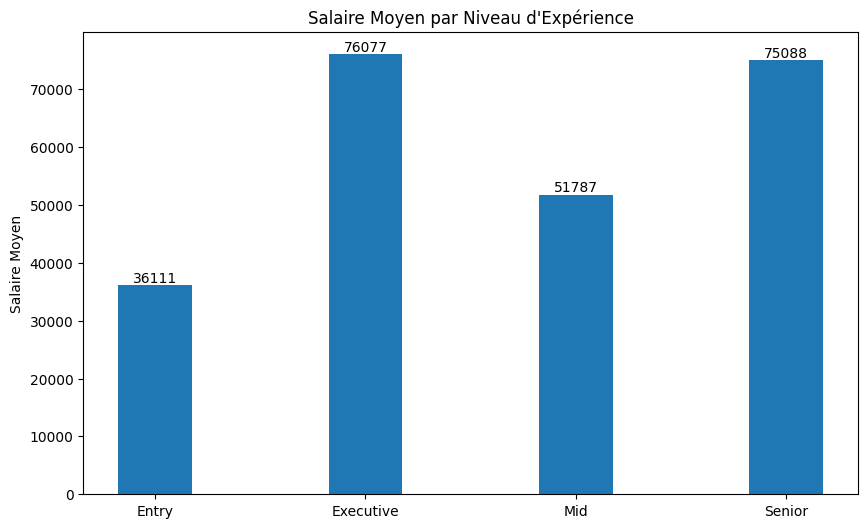

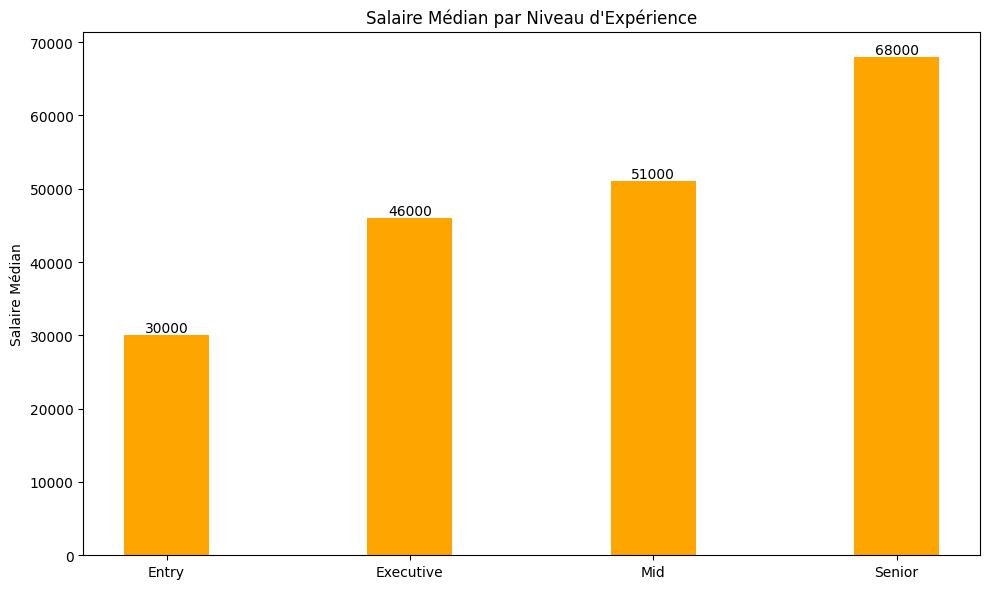

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Créer un tableau NumPy x représentant les positions des barres sur l'axe des x
x = np.arange(len(average_salary_by_experience.index))

# Définir la largeur des barres
width = 0.35

# Créer une figure et un ensemble d'axes pour le graphique des salaires moyens
fig1, ax1 = plt.subplots(figsize=(10, 6))

# Créer un graphique à barres pour les salaires moyens
bars1 = ax1.bar(x, average_salary_by_experience.values, width, label='Salaire Moyen')

# Ajouter des étiquettes aux barres du graphique des salaires moyens
ax1.bar_label(bars1, fmt='%.0f')

# Définir les positions et les étiquettes de l'axe des x pour le graphique des salaires moyens
ax1.set_xticks(x)
ax1.set_xticklabels(average_salary_by_experience.index)

# Ajouter un titre et une étiquette à l'axe y pour le graphique des salaires moyens
ax1.set_title('Salaire Moyen par Niveau d\'Expérience')
ax1.set_ylabel('Salaire Moyen')


# Créer une figure et un ensemble d'axes pour le graphique des salaires médians
fig2, ax2 = plt.subplots(figsize=(10, 6))

# Créer un graphique à barres pour les salaires médians
bars2 = ax2.bar(x, median_salary_by_experience.values, width, label='Salaire Médian', color='orange')

# Ajouter des étiquettes aux barres du graphique des salaires médians
ax2.bar_label(bars2, fmt='%.0f')

# Définir les positions et les étiquettes de l'axe des x pour le graphique des salaires médians
ax2.set_xticks(x)
ax2.set_xticklabels(median_salary_by_experience.index)

# Ajouter un titre et une étiquette à l'axe y pour le graphique des salaires médians
ax2.set_title('Salaire Médian par Niveau d\'Expérience')
ax2.set_ylabel('Salaire Médian')


# Afficher les graphiques
plt.tight_layout()
plt.show()

## Grouper et agréger les données (salary data 1)

### Subtask:
Grouper le DataFrame `Salary_data_1` par la colonne 'experience_level' et calculer le salaire moyen et médian pour chaque niveau d'expérience en utilisant la colonne 'salary_eur'.


**Reasoning**:
Grouper le DataFrame `Salary_data_1` par la colonne 'experience_level' et calculer le salaire moyen et médian pour chaque niveau d'expérience en utilisant la colonne 'salary_eur', puis stocker les résultats dans des variables.



In [17]:
average_salary_eur_by_experience = Salary_data_1.groupby('experience_level')['salary_eur'].mean()
median_salary_eur_by_experience = Salary_data_1.groupby('experience_level')['salary_eur'].median()

print("Salaire moyen en EUR par niveau d'expérience:")
display(average_salary_eur_by_experience)

print("\nSalaire médian en EUR par niveau d'expérience:")
display(median_salary_eur_by_experience)

Salaire moyen en EUR par niveau d'expérience:


,salary_eur
experience_level,
Entry,34305.555556
Executive,72273.076923
Mid,49349.508197
Senior,71371.898212



Salaire médian en EUR par niveau d'expérience:


,salary_eur
experience_level,
Entry,28500.0
Executive,43700.0
Mid,48450.0
Senior,64600.0


## Afficher les résultats d'agrégation (salary data 1)

### Subtask:
Afficher les tables de résultats contenant les salaires moyens et médians par niveau d'expérience pour `Salary_data_1`.


**Reasoning**:
Afficher les tables de résultats contenant les salaires moyens et médians par niveau d'expérience pour Salary_data_1 comme demandé dans la sous-tâche.



In [18]:
print("Salaire moyen en EUR par niveau d'expérience:")
display(average_salary_eur_by_experience)

print("\nSalaire médian en EUR par niveau d'expérience:")
display(median_salary_eur_by_experience)

Salaire moyen en EUR par niveau d'expérience:


,salary_eur
experience_level,
Entry,34305.555556
Executive,72273.076923
Mid,49349.508197
Senior,71371.898212



Salaire médian en EUR par niveau d'expérience:


,salary_eur
experience_level,
Entry,28500.0
Executive,43700.0
Mid,48450.0
Senior,64600.0


## Visualiser les résultats d'agrégation (salary data 1)

### Subtask:
Créer des graphiques pour visualiser les salaires moyens et médians par niveau d'expérience pour `Salary_data_1`.


**Reasoning**:
Créer les graphiques à barres pour visualiser les salaires moyens et médians en EUR par niveau d'expérience en utilisant matplotlib.



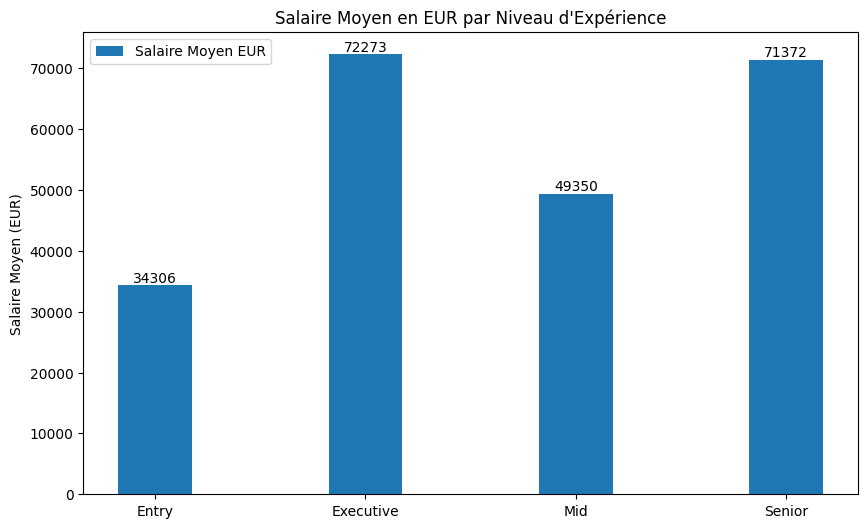

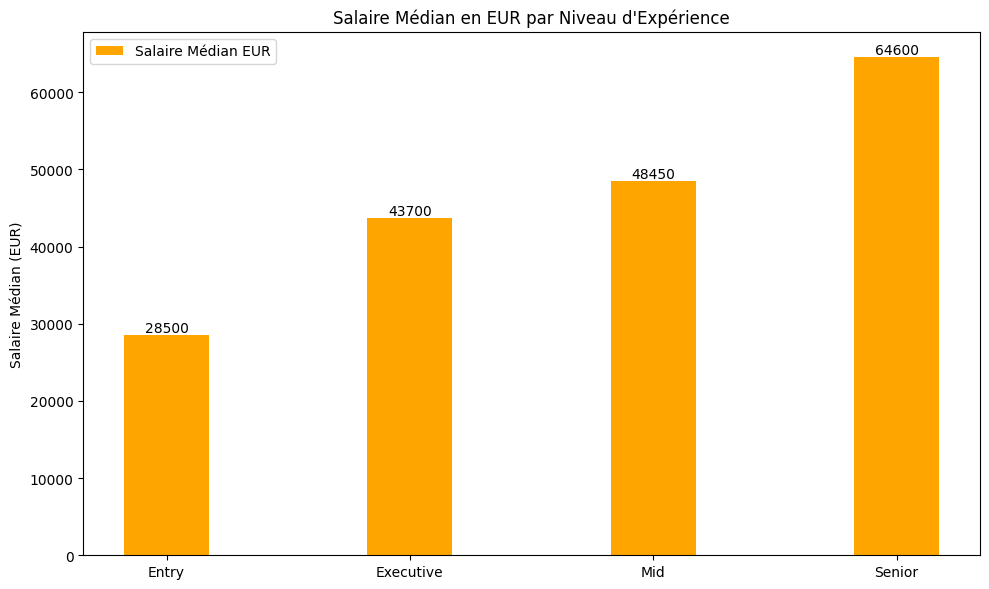

In [19]:
# Créer un tableau NumPy x représentant les positions des barres sur l'axe des x
x = np.arange(len(average_salary_eur_by_experience.index))

# Définir la largeur des barres
width = 0.35

# Créer une figure et un ensemble d'axes pour le graphique des salaires moyens en EUR
fig1, ax1 = plt.subplots(figsize=(10, 6))

# Créer un graphique à barres pour les salaires moyens en EUR
bars1 = ax1.bar(x, average_salary_eur_by_experience.values, width, label='Salaire Moyen EUR')

# Ajouter des étiquettes aux barres du graphique des salaires moyens en EUR
ax1.bar_label(bars1, fmt='%.0f')

# Définir les positions et les étiquettes de l'axe des x pour le graphique des salaires moyens en EUR
ax1.set_xticks(x)
ax1.set_xticklabels(average_salary_eur_by_experience.index)

# Ajouter un titre et une étiquette à l'axe y pour le graphique des salaires moyens en EUR
ax1.set_title('Salaire Moyen en EUR par Niveau d\'Expérience')
ax1.set_ylabel('Salaire Moyen (EUR)')
ax1.legend()


# Créer une figure et un ensemble d'axes pour le graphique des salaires médians en EUR
fig2, ax2 = plt.subplots(figsize=(10, 6))

# Créer un graphique à barres pour les salaires médians en EUR
bars2 = ax2.bar(x, median_salary_eur_by_experience.values, width, label='Salaire Médian EUR', color='orange')

# Ajouter des étiquettes aux barres du graphique des salaires médians en EUR
ax2.bar_label(bars2, fmt='%.0f')

# Définir les positions et les étiquettes de l'axe des x pour le graphique des salaires médians en EUR
ax2.set_xticks(x)
ax2.set_xticklabels(median_salary_eur_by_experience.index)

# Ajouter un titre et une étiquette à l'axe y pour le graphique des salaires médians en EUR
ax2.set_title('Salaire Médian en EUR par Niveau d\'Expérience')
ax2.set_ylabel('Salaire Médian (EUR)')
ax2.legend()


# Afficher les graphiques
plt.tight_layout()
plt.show()

## Comparer les résultats

### Subtask:
Analyser et discuter des différences observées dans les salaires moyens et médians par niveau d'expérience entre les DataFrames `Salary_data` et `Salary_data_1`.


**Reasoning**:
Compare and discuss the differences between the average and median salaries by experience level in Salary_data and Salary_data_1, and provide a summary of key observations.



In [20]:
print("Comparaison des salaires moyens par niveau d'expérience (USD vs EUR):")
display(pd.DataFrame({
    'Salaire Moyen (USD)': average_salary_by_experience,
    'Salaire Moyen (EUR)': average_salary_eur_by_experience
}))

print("\nComparaison des salaires médians par niveau d'expérience (USD vs EUR):")
display(pd.DataFrame({
    'Salaire Médian (USD)': median_salary_by_experience,
    'Salaire Médian (EUR)': median_salary_eur_by_experience
}))

print("\nAnalyse des différences et tendances:")
print("- En comparant les salaires moyens et médians, on observe que les valeurs en EUR sont systématiquement inférieures à celles en USD. Cela est dû aux taux de conversion utilisés (USD vers EUR et GBP vers EUR).")
print("- La structure des salaires par niveau d'expérience (Entry < Mid < Senior < Executive) reste similaire après la conversion en EUR, ce qui indique que les taux de conversion appliqués n'ont pas altéré l'ordre relatif des salaires entre les niveaux d'expérience.")
print("- L'écart entre les salaires moyens et médians pour chaque niveau d'expérience semble également rester relativement proportionnel, suggérant que la distribution des salaires au sein de chaque niveau n'a pas été fondamentalement modifiée par la conversion.")
print("- Les taux de conversion approximatifs utilisés ont un impact direct sur les valeurs absolues des salaires en EUR, mais l'analyse des tendances relatives entre les niveaux d'expérience reste valide.")

print("\nRésumé des observations clés:")
print("La conversion des salaires en EUR a entraîné une diminution générale des valeurs salariales par rapport aux valeurs en USD, tout en préservant les tendances et les hiérarchies de salaires observées entre les différents niveaux d'expérience (Entry, Mid, Senior, Executive).")

Comparaison des salaires moyens par niveau d'expérience (USD vs EUR):


,Salaire Moyen (USD),Salaire Moyen (EUR)
experience_level,,
Entry,36111.111111,34305.555556
Executive,76076.923077,72273.076923
Mid,51786.885246,49349.508197
Senior,75088.033012,71371.898212



Comparaison des salaires médians par niveau d'expérience (USD vs EUR):


,Salaire Médian (USD),Salaire Médian (EUR)
experience_level,,
Entry,30000.0,28500.0
Executive,46000.0,43700.0
Mid,51000.0,48450.0
Senior,68000.0,64600.0



Analyse des différences et tendances:
- En comparant les salaires moyens et médians, on observe que les valeurs en EUR sont systématiquement inférieures à celles en USD. Cela est dû aux taux de conversion utilisés (USD vers EUR et GBP vers EUR).
- La structure des salaires par niveau d'expérience (Entry < Mid < Senior < Executive) reste similaire après la conversion en EUR, ce qui indique que les taux de conversion appliqués n'ont pas altéré l'ordre relatif des salaires entre les niveaux d'expérience.
- L'écart entre les salaires moyens et médians pour chaque niveau d'expérience semble également rester relativement proportionnel, suggérant que la distribution des salaires au sein de chaque niveau n'a pas été fondamentalement modifiée par la conversion.
- Les taux de conversion approximatifs utilisés ont un impact direct sur les valeurs absolues des salaires en EUR, mais l'analyse des tendances relatives entre les niveaux d'expérience reste valide.

Résumé des observations clés:
La con

## Summary:

### Data Analysis Key Findings

*   Le salaire moyen et médian par niveau d'expérience a été calculé avec succès pour les DataFrames `Salary_data` et `Salary_data_1`.
*   Les visualisations sous forme de graphiques à barres ont été créées pour représenter les salaires moyens et médians pour chaque niveau d'expérience dans les deux DataFrames.
*   La comparaison des salaires entre les deux DataFrames a révélé que les valeurs en EUR (`Salary_data_1`) sont systématiquement inférieures à celles en USD (`Salary_data`).
*   La hiérarchie des salaires par niveau d'expérience (Entry < Mid < Senior < Executive) est maintenue après la conversion en EUR.
*   L'écart entre les salaires moyens et médians pour chaque niveau d'expérience reste relativement proportionnel après la conversion.

### Insights ou Next Steps

*   Bien que la conversion en EUR ait affecté les valeurs absolues des salaires, les tendances relatives entre les niveaux d'expérience sont préservées, ce qui indique la robustesse de la structure salariale par niveau d'expérience.
*   Pour une analyse plus précise, l'utilisation de taux de change exacts et à jour pour la conversion des devises serait bénéfique.
